In [2]:
import arcgis
from arcgis.gis import GIS
import os
from arcgis.geoenrichment import *
from dotenv import load_dotenv
import requests

load_dotenv()

def request_token():
  #Datos de tu aplicación
  client_id = os.getenv("CLIENT_ID")
  client_secret = os.getenv("CLIENT_SECRET")

  # URL del endpoint de autenticación
  auth_url = "https://www.arcgis.com/sharing/rest/oauth2/token"

  # Parámetros para la solicitud de token
  payload = {
      "client_id": client_id,
      "client_secret": client_secret,
      "grant_type": "client_credentials"
  }

  # Realiza la solicitud de token
  response = requests.post(auth_url, data=payload)

  # Verifica si la solicitud fue exitosa
  if response.status_code == 200:
      # Extrae el token de acceso del JSON de respuesta
      access_token = response.json()["access_token"]
      return access_token
  else:
      print("Error:", response.json()["error"])
      
access_token = request_token()

C:\ProgramData\Anaconda3\lib\site-packages\arcgis\features\_data\geodataset\utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt

map_data = gpd.read_file("file.geojson")
zip_map = gpd.read_file("fl_florida_zip_codes_geo.min.json")
zip_map

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,12,32606,1232606,B5,G6350,S,44273265,253128,+29.6820042,-082.4440962,N,"POLYGON ((-82.37990 29.67955, -82.38003 29.679..."
1,12,32609,1232609,B5,G6350,S,290843169,6376578,+29.7689903,-082.2825337,N,"MULTIPOLYGON (((-82.35105 29.72611, -82.35094 ..."
2,12,32612,1232612,B5,G6350,S,2117657,310044,+29.6431195,-082.3538453,N,"MULTIPOLYGON (((-82.35040 29.64489, -82.35040 ..."
3,12,32234,1232234,B5,G6350,S,335454814,1292362,+30.2260009,-081.9835221,N,"POLYGON ((-82.03100 30.14228, -82.03132 30.142..."
4,12,32438,1232438,B5,G6350,S,162751694,964947,+30.5012874,-085.4240809,N,"POLYGON ((-85.35526 30.53367, -85.35410 30.533..."
...,...,...,...,...,...,...,...,...,...,...,...,...
978,12,32129,1232129,B5,G6350,S,19276444,651408,+29.1369736,-081.0239569,N,"POLYGON ((-80.99360 29.15030, -80.99358 29.149..."
979,12,32168,1232168,B5,G6350,S,424964754,5791624,+28.9637734,-081.0294134,N,"POLYGON ((-81.02429 28.87645, -81.02489 28.876..."
980,12,32738,1232738,B5,G6350,S,66976215,8358124,+28.9052691,-081.1851759,N,"POLYGON ((-81.21764 28.89041, -81.21749 28.890..."
981,12,32141,1232141,B5,G6350,S,60921307,2134685,+28.9289532,-080.9191350,N,"POLYGON ((-80.91498 28.96535, -80.91481 28.965..."


<Axes: >

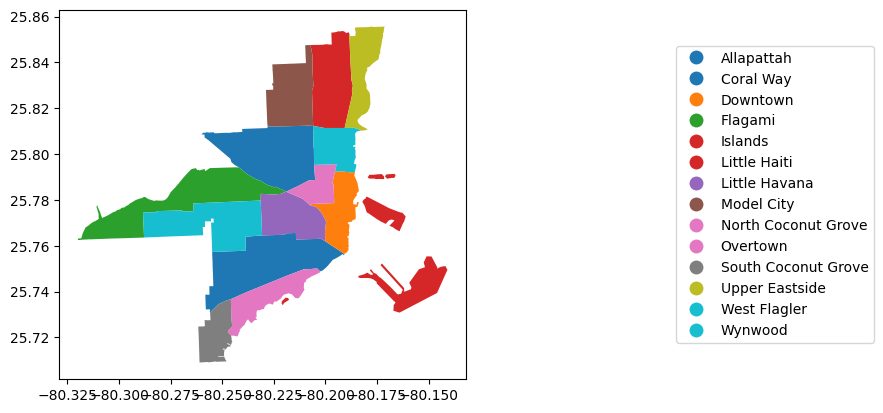

In [10]:
map_data.plot(column="name",
  legend=True,
  legend_kwds={"loc": "center left", "bbox_to_anchor": (1.5, 0.5)}
)

In [1]:
import pandas as pd
import requests

url = "https://files.zillowstatic.com/research/public_csvs/zhvi/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1693954783"

response = requests.get(url)

if response.status_code == 200:
    # Content has been successfully retrieved
    csv_data = response.text
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    csv_data = None


/Users/david/Desktop/1/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:

# Read the CSV data into a DataFrame
df = pd.read_csv(csv_data)
# Now, you can work with the DataFrame 'df' as needed
print(df.head())  # Print the first few rows of the DataFrame


In [69]:
zip_codes = pd.read_csv("zip_code_database.csv")

In [50]:
zip_codes["county, state"] = zip_codes["county"] + ", " + zip_codes["state"]

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population,"county, state"
14539,33131,STANDARD,0,Miami,NaN,NaN,FL,Miami-Dade County,America/New_York,"305, 786",NaN,US,25.77,-80.18,20640,"Miami-Dade County, FL"


In [60]:
zip_map["ZCTA5CE10"] = zip_map["ZCTA5CE10"].astype(int)

In [62]:
zip_map = zip_map.merge(zip_codes, how="left", left_on="ZCTA5CE10", right_on="zip")

In [77]:
zip_map = zip_map.drop(columns=zip_map.columns[zip_map.nunique()==1], index=0)

In [97]:
zip_map = zip_map.drop(columns=(["decommissioned", "type", "irs_estimated_population", "latitude", "longitude", "ZCTA5CE10"]), axis=1)
zip_map = zip_map.dropna(axis=1)

In [113]:
zip_map["zip"] = zip_map["zip"].astype(str)

<Axes: >

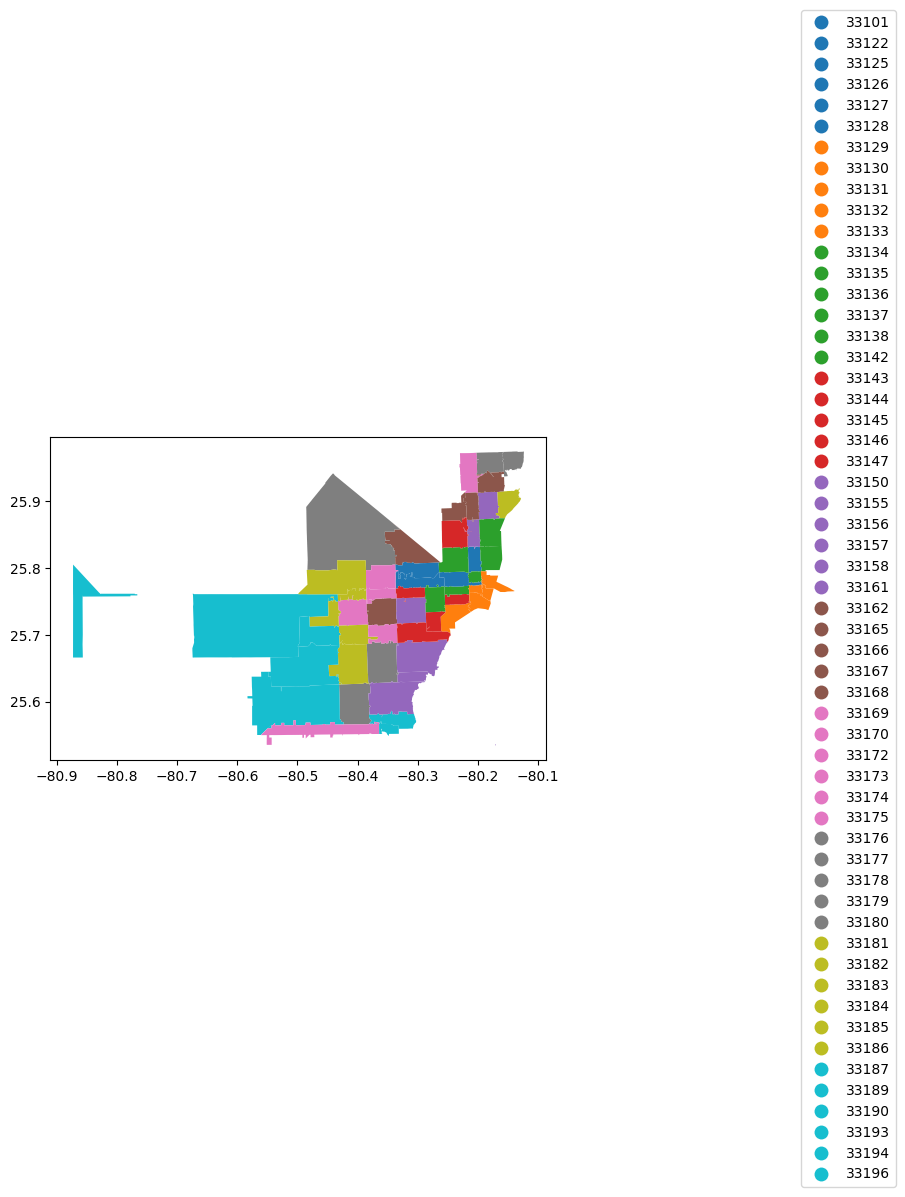

In [114]:
zip_map[zip_map["primary_city"]=="Miami"].plot(
  column="zip",
  legend=True,
  legend_kwds={"loc": "center left", "bbox_to_anchor": (1.5, 0.5)}
)

In [107]:
zip_map[zip_map["primary_city"]=="Miami"]

,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,zip,primary_city,county,timezone,area_codes,"county, state"
69,1233175,19941299,824167,+25.7347340,-080.4067568,"MULTIPOLYGON (((-80.38313 25.73648, -80.38191 ...",33175,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
70,1233177,32437142,770487,+25.5961291,-080.4041945,"POLYGON ((-80.38088 25.59545, -80.38089 25.594...",33177,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
71,1233194,229835953,6645729,+25.7139385,-080.5836189,"MULTIPOLYGON (((-80.82238 25.76172, -80.82156 ...",33194,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
72,1233133,10817743,3652423,+25.7286620,-080.2399959,"POLYGON ((-80.26108 25.71191, -80.26111 25.712...",33133,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
73,1233145,6575725,0,+25.7531315,-080.2344271,"POLYGON ((-80.23661 25.76063, -80.23458 25.760...",33145,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
74,1233161,14161688,146971,+25.8936643,-080.1815389,"POLYGON ((-80.16987 25.87891, -80.16706 25.880...",33161,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
75,1233128,1028612,49487,+25.7761676,-080.2037327,"POLYGON ((-80.21311 25.77840, -80.21188 25.778...",33128,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
76,1233165,19731737,652688,+25.7343451,-080.3582710,"POLYGON ((-80.38298 25.72967, -80.38313 25.729...",33165,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
174,1233187,102474627,398757,+25.5958962,-080.5069087,"POLYGON ((-80.42947 25.57691, -80.42945 25.573...",33187,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
175,1233186,32730302,2344062,+25.6543461,-080.4122860,"MULTIPOLYGON (((-80.42973 25.62627, -80.43083 ...",33186,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
